# The Sparks Foundation [GRIP: Dec, 2022]
## Data Science and Business Analytics Internship
#### **Task 1:** Prediction Using Supervised Machine Learning [Level: Beginner]
- **Problem Statement:** To predict the percentage of a student based on the number of study hours

#### **Author:** Rohit Rannavre

In [1]:
# importing dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
# loading the dataset
df = pd.read_csv('/content/dataset_1.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# checking the shape (number of rows and columns) of the dataset
df.shape

(25, 2)

In [4]:
# checking datatypes, missing values, dataset size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# getting a statistical summary of the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


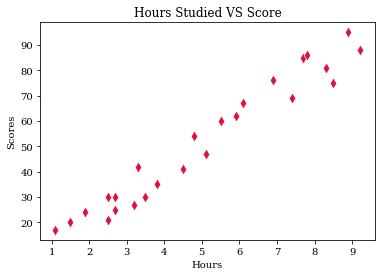

In [6]:
# plotting the relationship between the independent and the dependent features
sns.scatterplot(data=df, x='Hours', y='Scores', s=60, color='crimson', marker='d')
plt.xlabel('Hours', family='serif')
plt.ylabel('Scores', family='serif')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Hours Studied VS Score', family='serif', size=12)
plt.show()

In [7]:
# defining the independent(X) and dependent(y) features
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [8]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [9]:
# checking the shape of X and y 
print("X train shape =", X_train.shape)
print("X test shape =", X_test.shape)
print("y train shape =", y_train.shape)
print("y test shape =", y_test.shape)

X train shape = (20, 1)
X test shape = (5, 1)
y train shape = (20,)
y test shape = (5,)


In [10]:
# training a linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

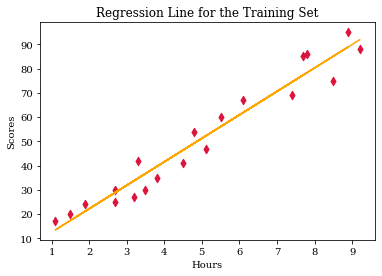

In [11]:
# plotting the regression line for the training set
y_0 = linreg.intercept_ + linreg.coef_ * X_train
plt.scatter(X_train, y_train, color='crimson', marker='d')
plt.plot(X_train, y_0, color='orange')
plt.xlabel("Hours", family='serif')
plt.ylabel("Scores", family='serif')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title("Regression Line for the Training Set", fontsize=12, family='serif')
plt.show()

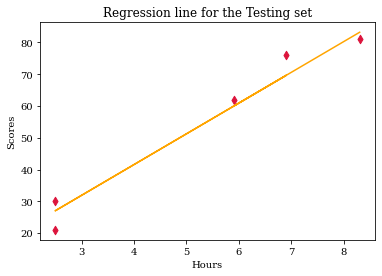

In [12]:
# plotting the regression line for the testing set
y_pred = linreg.predict(X_test)
plt.scatter(X_test, y_test, color='crimson', marker='d')
plt.plot(X_test, y_pred, color='orange')
plt.xlabel("Hours", family='serif')
plt.ylabel("Scores", family='serif')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title("Regression line for the Testing set", fontsize=12, family='serif')
plt.show()

In [13]:
# comparing the actual vs the predicted values
y_test_data = list(y_test)
y_pred_data = list(y_pred)
df_compare = pd.DataFrame({'Actual': y_test_data, 'Predicted': y_pred_data})
df_compare

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [14]:
# checking errors of the model using different metrics
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))

Mean Squared Error:  18.943211722315272
Root Mean Squared Error:  4.352380006653288
Mean Absolute Error:  3.9207511902099244


In [15]:
# checking the accuracy of the model
print('R2 score: ', (r2_score(y_test, y_pred) * 100).round(2))

R2 score:  96.78


In [16]:
# predict the given query of 9.25 hours
query = linreg.predict([[9.25]])
print("Predicted marks for a student studying for 9.25 hours/day: ", query.round(2))

Predicted marks for a student studying for 9.25 hours/day:  [92.39]


## **Conclusion**: *A student studying for 9.25 hours daily is very much likey to score 92.39 marks.*